In [35]:
from os import environ
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
import numpy as np
from tensorflow.keras import Sequential, layers
import os
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import os
import tensorflow.keras
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def blur_func(img,k=5):
    ksize = (k, k)
    blur = cv2.blur(img, ksize) 
    return blur

In [9]:
val_flow_from_dir = ImageDataGenerator(rescale = 1./255)

X_val = val_flow_from_dir.flow_from_directory('../raw_data/images/validation/',
                                                    batch_size=32,
                                                   classes = ['no_dunes',
                                                             'dunes'],
                                                    class_mode='binary',
                                                    color_mode="grayscale",
                                                    target_size=(256, 256))

X_train_flow_from_dir = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=[blur_func],
                                    zca_whitening=True,
                                    brightness_range=(.5,1.5))

X_train = X_train_flow_from_dir.flow_from_directory('../raw_data/images/training/',
                                                    batch_size=32,
                                                   classes = ['no_dunes',
                                                             'dunes'],
                                                    class_mode='binary',
                                                    color_mode="grayscale",
                                                    target_size=(256, 256))

Found 7896 images belonging to 2 classes.


/Users/cedric/.pyenv/versions/marswinds/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 488672 images belonging to 2 classes.


In [33]:
type(X_train(0))#[0][0])

TypeError: 'DirectoryIterator' object is not callable

In [44]:
file = '../raw_data/model_tests/dropout_tests.csv'
tests = pd.read_csv(file)
tests

,dropout,epoch,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.0,1,0.1856,0.9279,0.9367,0.9179,0.2783,0.8675,0.9142,0.8092
1,0.0,2,0.1101,0.9595,0.9647,0.9538,0.7415,0.7708,0.7306,0.8535
2,0.0,3,0.0884,0.9683,0.9731,0.9633,0.2283,0.9189,0.8886,0.9566
3,0.0,4,0.0788,0.9722,0.9768,0.9673,0.3026,0.8826,0.9032,0.8553
4,0.2,1,0.2461,0.9020,0.9018,/9024,0.4489,0.8252,0.8688,0.7662
5,0.2,2,0.1496,0.9428,0.9432,0.9425,1.4392,0.4168,0.3700,0.2368
6,0.2,3,0.1336,0.9498,0.9483,0.9516,0.8711,0.5742,0.7434,0.2267
7,0.2,4,0.1206,0.9549,0.9533,0.9568,0.5531,0.8273,0.7600,0.9567
8,0.5,1,0.3152,0.8742,0.8732,0.8756,0.6764,0.7120,0.7465,0.6421
9,0.5,2,0.1904,0.9258,0.9234,0.9286,0.8042,0.4814,0.4556,0.1910


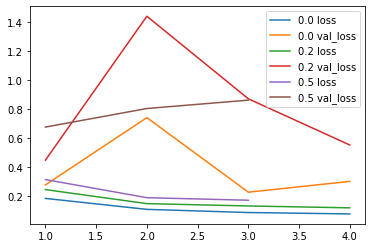

In [46]:
groups = tests.groupby(by='dropout')

for name,group in groups:
    plt.plot(group.epoch, group.loss, label=f'{name} loss')
    plt.plot(group.epoch, group.val_loss,label=f'{name} val_loss')
plt.legend()